<a href="https://colab.research.google.com/github/gabrielavelino/teste/blob/master/FastAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

! [ -e /content ] && pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 34.8 MB/s 
     |████████████████████████████████| 365 kB 67.2 MB/s 
     |████████████████████████████████| 4.7 MB 53.2 MB/s 
     |████████████████████████████████| 1.3 MB 61.8 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
     |████████████████████████████████| 212 kB 74.4 MB/s 
     |████████████████████████████████| 141 kB 72.8 MB/s 
     |████████████████████████████████| 115 kB 77.9 MB/s 
     |████████████████████████████████| 596 kB 64.6 MB/s 
     |████████████████████████████████| 127 kB 78.3 MB/s 
     |████████████████████████████████| 6.6 MB 52.5 MB/s 


In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [6]:
from fastbook import *
from fastai.vision.all import *

In [8]:

coco = untar_data(URLs.COCO_TINY)
images, lbl_bbox = get_annotations(coco/'train.json')
img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:img2bbox[o.name]

In [53]:
c = set()
for i in lbl_bbox:
  c = c.union(set(i[1]))
c

{'book', 'chair', 'couch', 'remote', 'tv', 'vase'}

In [9]:
Path.BASE_PATH = coco

In [26]:
lbl_bbox[0]

([[32.52, 86.34, 41.050000000000004, 95.75],
  [98.12, 110.52, 100.07000000000001, 114.59],
  [91.28, 51.62, 95.23, 57.339999999999996],
  [110.48, 110.82, 125.03, 126.03999999999999],
  [96.63, 50.18, 115.3, 63.64],
  [0.69, 111.73, 12.49, 124.79]],
 ['chair', 'vase', 'vase', 'chair', 'chair', 'chair'])

In [31]:
getters = [lambda o: coco/'train'/o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

In [32]:
def get_train_imgs(noop):  return images

In [33]:
objects = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 get_items=get_train_imgs,
                 getters=getters,
                 n_inp=1)

In [34]:
dls = objects.dataloaders(coco/'train')

In [40]:
# Numero de classes
dls.c = 6

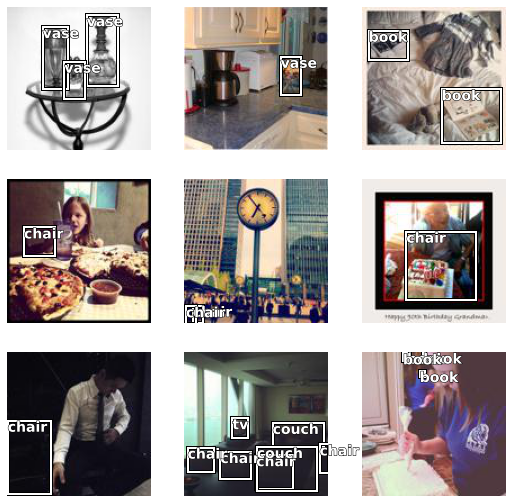

In [55]:
dls.show_batch()

In [10]:
coco.ls()

(#2) [Path('train.json'),Path('train')]